In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import missingno as msno

In [ ]:
df=pd.read_csv("/content/housing.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
print(x)

[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 ...
 [ 6.976  5.64  21.   ]
 [ 6.794  6.48  21.   ]
 [ 6.03   7.88  21.   ]]


In [ ]:
y=df.iloc[:,3].values
print(y)

[ 504000.  453600.  728700.  701400.  760200.  602700.  480900.  569100.
  346500.  396900.  315000.  396900.  455700.  428400.  382200.  417900.
  485100.  367500.  424200.  382200.  285600.  411600.  319200.  304500.
  327600.  291900.  348600.  310800.  386400.  441000.  266700.  304500.
  277200.  275100.  283500.  396900.  420000.  441000.  518700.  646800.
  732900.  558600.  531300.  518700.  445200.  405300.  420000.  348600.
  302400.  407400.  413700.  430500.  525000.  491400.  396900.  743400.
  518700.  663600.  489300.  411600.  392700.  336000.  466200.  525000.
  693000.  493500.  407400.  462000.  365400.  438900.  508200.  455700.
  478800.  491400.  506100.  449400.  420000.  436800.  445200.  426300.
  588000.  501900.  520800.  480900.  501900.  558600.  472500.  466200.
  495600.  602700.  474600.  462000.  480900.  525000.  432600.  596400.
  449400.  812700.  919800.  697200.  577500.  556500.  390600.  405300.
  422100.  409500.  409500.  428400.  415800.  4074

In [ ]:
imputer = KNNImputer(missing_values='NaN')
print(imputer)

KNNImputer(missing_values='NaN')


In [ ]:
imputerimputer=imputer.fit(x[:,1:3])
print(imputerimputer)

KNNImputer(missing_values='NaN')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_mask.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  Xt = X == value_to_mask


In [ ]:
x[:,1:3] = imputer.transform(x[:,1:3]).reshape(-1,2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_mask.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  Xt = X == value_to_mask


In [ ]:
label_encoder_x=LabelEncoder()
print(label_encoder_x)

LabelEncoder()


In [ ]:
x[:,0]=label_encoder_x.fit_transform(x[:,0])
print(x)

[[318.     4.98  15.3 ]
 [277.     9.14  17.8 ]
 [396.     4.03  17.8 ]
 ...
 [377.     5.64  21.  ]
 [354.     6.48  21.  ]
 [166.     7.88  21.  ]]


In [ ]:
onehot_encoder = OneHotEncoder()
print(onehot_encoder)

OneHotEncoder()


In [ ]:
x = onehot_encoder.fit_transform(x)
print(x)

  (0, 318)	1.0
  (0, 473)	1.0
  (0, 879)	1.0
  (1, 277)	1.0
  (1, 579)	1.0
  (1, 893)	1.0
  (2, 396)	1.0
  (2, 449)	1.0
  (2, 893)	1.0
  (3, 380)	1.0
  (3, 433)	1.0
  (3, 901)	1.0
  (4, 391)	1.0
  (4, 483)	1.0
  (4, 901)	1.0
  (5, 280)	1.0
  (5, 479)	1.0
  (5, 901)	1.0
  (6, 158)	1.0
  (6, 664)	1.0
  (6, 878)	1.0
  (7, 210)	1.0
  (7, 792)	1.0
  (7, 878)	1.0
  (8, 57)	1.0
  :	:
  (480, 906)	1.0
  (481, 161)	1.0
  (481, 674)	1.0
  (481, 906)	1.0
  (482, 42)	1.0
  (482, 723)	1.0
  (482, 906)	1.0
  (483, 165)	1.0
  (483, 703)	1.0
  (483, 906)	1.0
  (484, 321)	1.0
  (484, 598)	1.0
  (484, 912)	1.0
  (485, 191)	1.0
  (485, 576)	1.0
  (485, 912)	1.0
  (486, 377)	1.0
  (486, 489)	1.0
  (486, 912)	1.0
  (487, 354)	1.0
  (487, 510)	1.0
  (487, 912)	1.0
  (488, 166)	1.0
  (488, 553)	1.0
  (488, 912)	1.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

  (0, 219)	1.0
  (0, 681)	1.0
  (0, 910)	1.0
  (1, 32)	1.0
  (1, 779)	1.0
  (1, 910)	1.0
  (2, 24)	1.0
  (2, 797)	1.0
  (2, 910)	1.0
  (3, 262)	1.0
  (3, 829)	1.0
  (3, 910)	1.0
  (4, 313)	1.0
  (4, 445)	1.0
  (4, 891)	1.0
  (5, 128)	1.0
  (5, 581)	1.0
  (5, 908)	1.0
  (6, 294)	1.0
  (6, 758)	1.0
  (6, 910)	1.0
  (7, 96)	1.0
  (7, 860)	1.0
  (7, 910)	1.0
  (8, 195)	1.0
  :	:
  (382, 878)	1.0
  (383, 334)	1.0
  (383, 824)	1.0
  (383, 910)	1.0
  (384, 205)	1.0
  (384, 539)	1.0
  (384, 874)	1.0
  (385, 397)	1.0
  (385, 595)	1.0
  (385, 873)	1.0
  (386, 243)	1.0
  (386, 521)	1.0
  (386, 910)	1.0
  (387, 403)	1.0
  (387, 516)	1.0
  (387, 872)	1.0
  (388, 163)	1.0
  (388, 618)	1.0
  (388, 893)	1.0
  (389, 166)	1.0
  (389, 789)	1.0
  (389, 894)	1.0
  (390, 162)	1.0
  (390, 608)	1.0
  (390, 886)	1.0
  (0, 90)	1.0
  (0, 564)	1.0
  (0, 912)	1.0
  (1, 361)	1.0
  (1, 525)	1.0
  (1, 873)	1.0
  (2, 28)	1.0
  (2, 847)	1.0
  (2, 874)	1.0
  (3, 363)	1.0
  (3, 798)	1.0
  (3, 910)	1.0
  (4, 276)	1.0
  (4

In [ ]:
st_x=StandardScaler()
print(st_x)

StandardScaler()


In [ ]:
st_x = StandardScaler(with_mean=False)
x_train=st_x.fit_transform(x_train)
print(x_train)

  (0, 219)	14.01802915491956
  (0, 681)	19.799054626485685
  (0, 910)	2.2239614495936193
  (1, 32)	19.799054626485685
  (1, 779)	19.799054626485685
  (1, 910)	2.2239614495936193
  (2, 24)	19.799054626485685
  (2, 797)	19.799054626485685
  (2, 910)	2.2239614495936193
  (3, 262)	19.799054626485685
  (3, 829)	19.799054626485685
  (3, 910)	2.2239614495936193
  (4, 313)	19.799054626485685
  (4, 445)	14.01802915491956
  (4, 891)	5.3819798129578675
  (5, 128)	19.799054626485685
  (5, 581)	19.799054626485685
  (5, 908)	7.541576229397242
  (6, 294)	19.799054626485685
  (6, 758)	19.799054626485685
  (6, 910)	2.2239614495936193
  (7, 96)	19.799054626485685
  (7, 860)	19.799054626485685
  (7, 910)	2.2239614495936193
  (8, 195)	19.799054626485685
  :	:
  (382, 878)	7.541576229397242
  (383, 334)	19.799054626485685
  (383, 824)	19.799054626485685
  (383, 910)	2.2239614495936193
  (384, 205)	14.01802915491956
  (384, 539)	19.799054626485685
  (384, 874)	4.250000000000001
  (385, 397)	19.7990546264856

In [ ]:
x_test=st_x.transform(x_test)
print(x_test)

  (0, 90)	1.0
  (0, 564)	1.0
  (0, 912)	4.250000000000001
  (1, 361)	1.0
  (1, 525)	1.0
  (1, 873)	7.541576229397242
  (2, 28)	1.0
  (2, 847)	1.0
  (2, 874)	4.250000000000001
  (3, 363)	1.0
  (3, 798)	1.0
  (3, 910)	2.2239614495936193
  (4, 276)	14.01802915491956
  (4, 572)	1.0
  (4, 893)	4.7718423690306855
  (5, 272)	1.0
  (5, 795)	1.0
  (5, 910)	2.2239614495936193
  (6, 8)	1.0
  (6, 855)	1.0
  (6, 874)	4.250000000000001
  (7, 187)	1.0
  (7, 668)	19.799054626485685
  (7, 910)	2.2239614495936193
  (8, 206)	1.0
  :	:
  (89, 878)	7.541576229397242
  (90, 67)	1.0
  (90, 664)	1.0
  (90, 888)	11.460412963418737
  (91, 57)	1.0
  (91, 859)	1.0
  (91, 878)	7.541576229397242
  (92, 132)	19.799054626485685
  (92, 753)	1.0
  (92, 910)	2.2239614495936193
  (93, 340)	1.0
  (93, 745)	1.0
  (93, 910)	2.2239614495936193
  (94, 186)	19.799054626485685
  (94, 513)	1.0
  (94, 885)	8.900165917997015
  (95, 193)	19.799054626485685
  (95, 497)	19.799054626485685
  (95, 898)	5.206396093622531
  (96, 191)	1.0

data to be shown: 

[[ 2  1 35 47 31]
 [27 39  2 11 44]
 [29  3 21 31  5]
 [ 7 36  3 14 27]
 [ 9 44 34 36  2]]


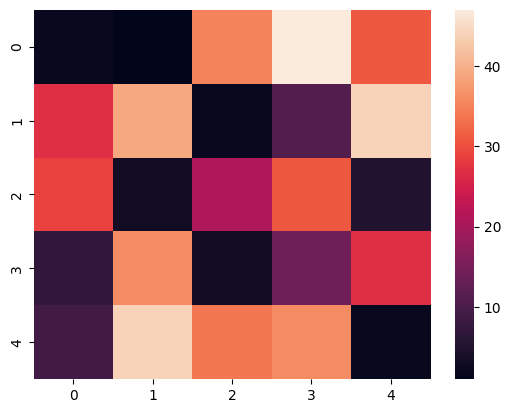

In [ ]:
df=np.random.randint(low=1,high=50,size=(5,5))
print("data to be shown: \n")
print(df)

hm=sns.heatmap(data=df)
plt.show()

